
# Basit Doğrusal Regresyon

In [3]:
import pandas as pd
ad = pd.read_csv("Advertising.csv")
df = ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [0]:
df = df.iloc[:,1:len(df)] # unnamed:0 diyerek indexi değişken olarak kullanmış. engellemek için satır olarak hepsini,
# sütun olarak 1 den len(df) e kadar aldık. böylece o gitmiş oldu.
# ad = pd.read_csv("original.csv",usecols = [1,2,3,4]) bu da istediğimiz sütunları almak için bir alternatif.

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [8]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


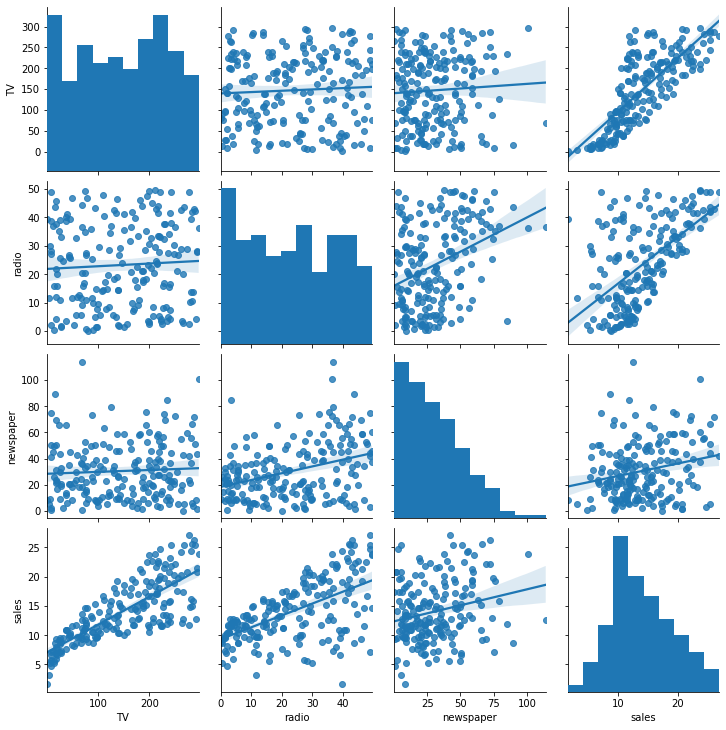

In [9]:
import seaborn as sns
sns.pairplot(df,kind = "reg")

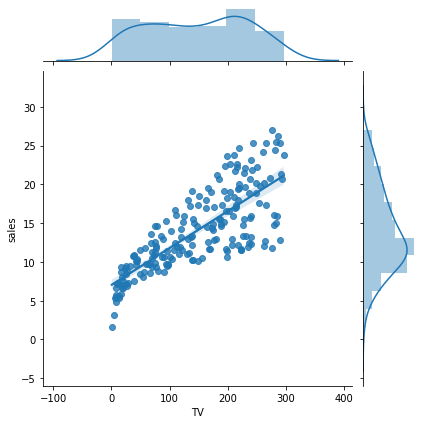

In [10]:
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg")

### Statsmodel ile modelleme

In [11]:
import statsmodels.api as sm

X = df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [12]:
X = sm.add_constant(X)
X[0:5]

# matris işlemleri için bir sabit ekledik.

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [0]:
y = df["sales"]

In [14]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [0]:
lm = sm.OLS(y,X)
# model oluştu

In [16]:
model = lm.fit()
model.summary()
# burda modeli fitledik ve bilgilere bakabiliriz.
# R squared değeri bağımsız değişkenin bağımlı değişkendeki değişime etkisini açıklar.
# 0.612 değeriyle gördüğümüz üzere bağımsız değişken bağımı değişkene %60 oranda açıklanabilir etkisi var.
# düzeltilmiş r kare değeri olan Adj. R-squared daha az duyarlıdır. şişmeye meyilli değildir. Daha düzgün bir değerdir.
# F statistic: modelin anlamlılığını bize verir.
# prob(F statistic): p value dır. f statistic ile karşılaştırınca modelin anlamlı olduğunu görüyoruz.
# burda const ile coef  kesişimi bize b0 sabitini verir. Yani TV değişkenin etkisi yokken ki y değişkeninin durumudur.
# TV ile coef in kesişimi ise X değişkenin katsayısı olan b1 parametresidir. Birim Tv başına y bağımlı değişkenine etkisi gösterilmiştir.
# t istatistiği yapılmış ve sabitlerin anlamlı olup olmmadığı verilmiştir. burada anlamlıdır.
# ve bu katsayıların güven aralığı verilmiştir. 
# buradan anlaşılan %95 güvenilirlik oranıyla TV değişkeni 0.043 ile 0.053 arasında olacaktır. vs. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 24 May 2020   Prob (F-statistic):           1.47e-42
Time:                        11:32:16   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
X2 = df["radio"]

In [0]:
lm2 = sm.OLS(y,X2) 

In [19]:
model2 = lm2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.807
Model:                            OLS   Adj. R-squared (uncentered):              0.806
Method:                 Least Squares   F-statistic:                              834.0
Date:                Sun, 24 May 2020   Prob (F-statistic):                    4.27e-73
Time:                        11:32:16   Log-Likelihood:                         -660.13
No. Observations:                 200   AIC:                                      1322.
Df Residuals:                     199   BIC:                                      1326.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
radio          0.4873      0.017     28.879      0.000       0.454       0.521
==============================================================================
Omnibus:                       29.193   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.013
Skew:                          -1.014   Prob(JB):                     9.18e-09
Kurtosis:                       3.577   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
# aynı modelleri kurmak için alternatif yöntem:

In [21]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 24 May 2020   Prob (F-statistic):           1.47e-42
Time:                        11:32:16   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model.params # modelin parametrelerine eriştik. ilki b0 ikinci b1

Intercept    7.032594
TV           0.047537
dtype: float64

In [23]:
model.summary().tables[1]
# katsayılara ilişkin değerlere eriştik.


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [24]:
model.conf_int() # sabitlerin güven aralığına eriştik

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [25]:
model.f_pvalue
print("f_pvalue : ", "%.3f" % model.f_pvalue)
# sabitlerin anlamlılığına yönelik p value değerleri

f_pvalue :  0.000


In [26]:
print("fvalue : ", "%.3f" % model.fvalue)
# f istatistiğine eriştik

fvalue :  312.145


In [27]:
print("tvalues : ", "%.3f" % model.tvalues[0:1]) # modelin anlamlılığına ilişkin t testi

tvalues :  15.360


In [28]:
model.mse_model # model değerlendirme istatistiğine eriştik yani hata karaler ortalaması yani birim başına yapılacak hata


3314.6181668686486

In [29]:
model.rsquared # r kare değerlerine eriştik, açıklanabilirlik oranı.

0.611875050850071

In [30]:
model.rsquared_adj # düzeltilmiş r kare

0.6099148238341623

In [31]:
model.fittedvalues[0:5] # y bağımlı değişkeninin tahmin edilen değerleri

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [32]:
y[0:5] # y bağımlı değişkeninin  gerçek değerleri

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [33]:
print("Sales = "+ str("%.2f" % model.params[0]) + "+TV"+"*"+str("%.2f" % model.params[1]))
# Sales ile Tv arasındaki  ilişkinin matematiksel formu

Sales = 7.03+TV*0.05


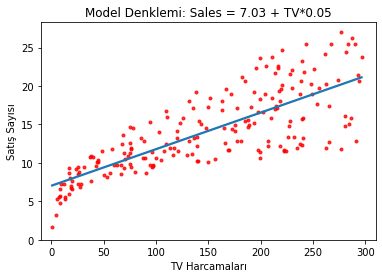

In [34]:
import matplotlib.pyplot as plt

g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom =0);
# modelin görsel formu

In [0]:
#Alterntif model oluşturma yöntemi

from sklearn.linear_model import  LinearRegression
reg = LinearRegression()
model = reg.fit(X,y)

In [36]:
model.score(X,y)
model.intercept_
model.coef_

array([0.        , 0.04753664])

In [37]:
model.predict(X)

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

In [0]:
# böylece veriyi analiz edip tanhim edecek makine öğrenmesi modeli oluşturduk.
# veriyi okuttuk ve tv reklamlarına ayırılacak bütçeyi girdiğinde ne kadarlık bir satış yapabileceğini tahmin ettik.

### Tahmin

Model Denklemi: 

Sales = 7,03 + TV*0,04

Örneğin: 30  birim Tv harcaması olduğunda satışların tahmini değeri kaç olur?

In [39]:
7.03 + 30*0.04

8.23

In [0]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X,y)

In [41]:
model.predict([[30]])

array([8.45869276])

### Artıklar Ve Makine Öğrenmesindeki Önemi


In [0]:
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
lm  = smf.ols("sales~TV", df)
model = lm.fit()

In [44]:
mse = mean_squared_error(y, model.fittedvalues) # gerçek değerler ile tahmini değerlerin arasındaki farkların kareleri.
# mse hata kareler ortalamasıdır. Birim başına yapılacak ortalama hata.
mse

10.512652915656753

In [45]:
import numpy as np

rmse = np.sqrt(mse) # mse nin karekökü alınmış hali.
rmse


3.2423221486546883

In [46]:
y[0:10] # gerçek değerler

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [0]:
k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": reg.predict(X)[0:10]})

In [0]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"] # hataları bulduk

In [49]:
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [0]:
# şimdi hataların ortalamasını almak istesek - ler ve + lar birbirini götüreceğinden hatalı bir değer elde ederiz
# bunu engellemek için ya mutlak değer alırım ya karesini

In [0]:
k_t["hata_kare"] = k_t["hata"]**2

In [52]:
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [53]:
np.sum(k_t["hata_kare"])

92.90350329638102

In [54]:
np.mean(k_t["hata_kare"])

9.290350329638102

In [55]:
np.sqrt( np.mean(k_t["hata_kare"]) )  # görüldüğü üzere ortalama 3 lük hata

3.048007599996775

In [0]:
# aslınnda hatayı bu halde bırakmamak gerekir hataların dağılımına bakılmalıdır.

In [57]:
model.resid[0:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

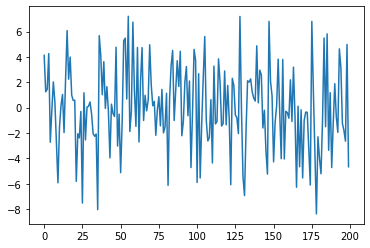

In [58]:
import matplotlib.pyplot as plt

plt.plot(model.resid)

# Çoklu Doğrusal Regresyon

In [129]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [0]:
X = df.drop("sales", axis = 1)
y = df["sales"]

# X bağımsız değişkenlerini y bağımlı değişkenlerini veriden ayrı ayrı topladık.

In [0]:
# şimdi veriyi test ve train olarak ayırmamız gerekiyor. bunu yapacağız.

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state= 42)
# oluşturduğumuz değişkenlere sırasıyla X in traini testi,y nin traini, testi olarak trin_test_split fonksiyonunu kullandık. 
# test_size olarak %20 dedik.sabitedik.

In [134]:
X_train.shape

(160, 3)

In [135]:
X_test.shape

(40, 3)

In [136]:
y_train.shape

(160,)

In [137]:
y_test.shape

(40,)

In [0]:
training = df.copy()

In [139]:
training.shape

(200, 4)

In [0]:
# sırada çoklu doğrusal regresyonu oluşturmak var.

## Statsmodels

In [0]:
import statsmodels.api as sm
lm = sm.OLS(y_train,X_train)


# YORUM:
# R-squared değeri %98 bu demek oluyor ki TV,Radio,Newspapper bağımsız değişkenleri toplam satışı %98 oranında açıklıyor.
# F statistic prob(bir nevi pvalue) dan büyük yani model anlamlı
# coef  in altında bağımsız değişkenlerin bir birimlik değişiminin bağımlı değişkene olan etkisini görürüz.
# sabitler(ß) anlamlıdır P>|t| kısmından görebiliriz

In [143]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Sun, 24 May 2020   Prob (F-statistic):                   1.28e-137
Time:                        11:49:18   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
model.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0531,0.001,36.467,0.000,0.050,0.056
radio,0.2188,0.011,20.138,0.000,0.197,0.240
newspaper,0.0239,0.008,3.011,0.003,0.008,0.040


## sklearn modeli

In [0]:
from sklearn.linear_model import  LinearRegression

lm = LinearRegression()
model = lm.fit(X_train,y_train) 

In [145]:
model.intercept_ # sabit katsayıdır. ß0

2.979067338122629

In [146]:
model.coef_ # bağımsız değişkenlerin atsayıları ß1,...,ßi

array([0.04472952, 0.18919505, 0.00276111])

## Tahmin

Model Denklemi:

Sales = 2.97 + TV*0.04+Radio*0.18+Newspapper*0.002

Örneğin: 30 birim tv harcaması 10 birim radio, 40 birim de gazete harcaması olduğunda satışlar ne olur?

In [0]:
yeni_veri = [[30],[10],[40]] # değişkenlerin değerlerini dizi halinde topladık..
yeni_veri = pd.DataFrame(yeni_veri).T # predict fonksiyonun anlayabileceği forma getirmek için dataframe e çevirdik.

In [148]:
model.predict(yeni_veri) # tahmin

array([6.32334798])

In [0]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [80]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train))) # burada X_değişkenleri üzerinden y yi tahmin etme işleminin hatası görülmektedir.
# rmse burda eeğitim hatasıdır.
rmse

1.644727765644337

In [150]:
rmse = np.sqrt(mean_squared_error(y_test,model.predict(X_test))) # burda dışarda  bıraktığımız X test değerleri üzerinden y test değerlerini tahmin etme
# işleminin hatası görülmektedir.
# burda rmse değeri test hatasıdır.
# daha önce test değerlerini hiç bir işleme tabii tutmamıştım.
# test hataları değerlidir. bunlar üzerinden hessaplanır genelde.
rmse

1.78159966153345

## Model Tunning/ Model Doğrulama
### Validation işlemleri

In [82]:
X = df.drop("sales",axis = 1)
y = df["sales"]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20, random_state = 42)
lm = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train))) # eğitim hatası

1.644727765644337

In [152]:
model.score(X_train,y_train)  # X_train in y_traini açıklama oranı olan r2 değeri

0.8957008271017818

In [0]:
# burada önemli bir durum var. Alacağımız test ve trainin sürekli değişmesini engelleyen random_state argümanının değerini değiştirdiğimde
# hata skorları da değişiyor. yani sorun hangi 0.20 yi alacağız mantığına benziyor aldığımız kısma göre değerler değişiyor.
# bunu engellemek için cross validation yani çapraz doğrulama yöntemi kullanacağız.
# böylece en doğru değerler üzerinden işlemler yapacağız.

In [154]:
cross_val_score(model,X,y,cv = 10, scoring="r2").mean()
# burada modeli X bağımsız değişkenini, y bağımlı değişkenini girdik ve cv  ile kaç katmanlı bir crosslama yapılacağını girdik. 
# scoring argümanına "r2" yani girdik modeldeki bağımsız değişkenin bağımlı değişkene etkisini valide edilmiş yani doğrulanmış, güvenilir olarak aldık.

0.8853562237979616

In [155]:
cross_val_score(model,X_train,y_train,cv = 10, scoring="r2").mean() # aynı işlemi train ler için yaptık.

0.7913548596916338

In [156]:
np.sqrt(-cross_val_score(model,X_train,y_train,cv = 10, scoring="neg_mean_squared_error").mean()) 
# elimde 10 katmannlı eğitim hatası değerlerinin pozitif halinin karekökleinin ortalaması var.
# yani valide edilmiş en güvenilir rmse değerleri, yani eğitim hatasıdır.

1.7201075950880973

In [157]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
# valide dilmemiş test hatasıdır.

1.78159966153345

In [158]:
np.sqrt(-cross_val_score(model,X_test,y_test,cv=10,scoring="neg_mean_squared_error").mean())
# bu da valide edilmiş test hatasıdır.

1.8710410072162282

*Eğitim hatası, test hatasının kötü bir tahmincisidir.*

# PCR Model

In [160]:
# n sayıda değişkenin taşıdığı bilgiyi daha az değişken kullanarak karşılamaya çalışmak fikrine dayanır.
# Bu indirgeme işlemi pca işlemi olarak geçer.
# Bu indirgenmiş haline regresyon modeli uygulandığında PCR gerçekleşmiş olur.
# Bunu yapmamızın sebebi bağımısız değişkenler arasında ilişki varsa) bu regresyon modelini yanıltıyor.
# indirgeme yaptıktan sonra modell oluşturduğumuzda bu ilişkiden büyük oranda kurtularak daha sağlıklı sonuçlar elde edebiliyoruz.
# Bunu yapmamızın bir diğer sebebi de değişken sayısının gözlem sayısından fazla olma durumu olan çok boyutluluk laneti adındaki sorunu yok etme çabasıdır.



import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [162]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [164]:
dms = pd.get_dummies(df[["League", "Division","NewLeague"]])
dms.head()
 # kategorik değişkenleri dummy değişkene çevirdik. One hot encoding dönüşümü yaptık.
 # bunnun sebebi bunlar bağımsız değişken ve etkilerini incelemek için numerikleştirmemiz gerekiyor.
 # ancak dummy değişken tuzağına düşmemek gerekir.
 # bu yüzden tekrar edenleri çıkracağız.

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [0]:
y = df["Salary"] # bağımlı değişkeni kaydettik

In [0]:
X_= df.drop(["Salary","League", "Division","NewLeague"], axis = 1).astype("float64") 
# kategorik değişkenlerin ilk hallerini ve bağımlı değişkeni çıkardım. regresyon kuracağımız için sadece sürekli değişkenleri seçtim 


In [167]:
X_.head

<bound method NDFrame.head of      AtBat   Hits  HmRun  Runs   RBI  ...   CRBI  CWalks  PutOuts  Assists  Errors
1    315.0   81.0    7.0  24.0  38.0  ...  414.0   375.0    632.0     43.0    10.0
2    479.0  130.0   18.0  66.0  72.0  ...  266.0   263.0    880.0     82.0    14.0
3    496.0  141.0   20.0  65.0  78.0  ...  838.0   354.0    200.0     11.0     3.0
4    321.0   87.0   10.0  39.0  42.0  ...   46.0    33.0    805.0     40.0     4.0
5    594.0  169.0    4.0  74.0  51.0  ...  336.0   194.0    282.0    421.0    25.0
..     ...    ...    ...   ...   ...  ...    ...     ...      ...      ...     ...
317  497.0  127.0    7.0  65.0  48.0  ...  311.0   138.0    325.0      9.0     3.0
318  492.0  136.0    5.0  76.0  50.0  ...  451.0   875.0    313.0    381.0    20.0
319  475.0  126.0    3.0  61.0  43.0  ...   93.0   146.0     37.0    113.0     7.0
320  573.0  144.0    9.0  85.0  60.0  ...  420.0   332.0   1314.0    131.0    12.0
321  631.0  170.0    9.0  77.0  44.0  ...  357.0   249.0 

In [168]:
X = pd.concat([X_, dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)
X.head()
 # sürekli değişkenlerden oluşan X_ bağımısz değişkenleri ile dummy kategorik bağımısz değişkenleri ayrı ayrı seçmiştim.
 # şimdi kategorik değişkenleri dummy tuzağından kurtarıp sürekli değişkenler ile birleştirdim.
 # ve sonuçta numerikleşmiş kategorik değişkenler ve normal sürekl değişkenlerden oluşan X bağımsız değişkeni oluştu.

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state= 42)

In [0]:
# sklearn doğrudan PCR modelini yapacak fonksiyonlara sahip değil.
# bu sebeple kendimiz yapacağız.
# öncelikle PCA yani indirgeme işlemini yapacağız.

In [0]:
from sklearn.decomposition import PCA # indirgeme için
from sklearn.preprocessing import scale # ölçeklendirme için
pca = PCA() # normalde bileşen sayısı için argüman girilebilir ama ben girmedim böylece değişken sayısı kadar bileşen oluşturacak.

In [0]:
X_reduced_train  = pca.fit_transform(scale(X_train)) # kendi oluşturduğum değişkene ölçeklendirme ve indirgeme  yaptım.
# şöyleki pca nesnesini fitlemiş oluyoruz yani veriseti indiirgenmiş oluyor.
# ve aynı zamanda scale(X_train) diyerek ölçeklendirme de yapmış oluyoruz.

In [0]:
# şu an en son elde ettiğimiz veri seti ile indirgenmiş, aralarında herhangi bir bağlantı bulunmayan bir veri elde ettik.
# değişken sayısı kadar  bileşen vardır.

In [176]:
X_reduced_train[0:1,:] # şu an 1. gözlem ve tüm bileşenleri görüyoruz.

array([[-1.91335121, -2.01656078,  1.28783438,  3.40629242,  0.49008919,
         0.45518079, -0.28391172,  0.71141536,  0.20321472,  0.75690289,
         0.00970493,  0.18753423,  0.13828004,  0.29886184,  0.17913327,
        -0.24470371,  0.02667039,  0.05118204, -0.00806432]])

In [177]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:10]
# burda bileşen sayısının verisetinin varyanını açıklama oranı görülmektedir
# yani 1 değişken ile toplam varyansın %38 ini, 3 değişkenle %60 ını, 10 değişkene %97 sini açıklayabilmekteyiz.
# böylece pcr ın ana amacı olan değişkenleri daha aza indirgeyerek veri setini açıklama işlemi yapılmıştır.

array([38.73, 60.  , 70.89, 79.06, 84.31, 88.55, 92.11, 94.86, 96.35,
       97.3 ])

In [0]:
# artık bunun üzerine regresyon model kurabiliriz.

In [0]:
lm = LinearRegression()

In [0]:
pcr_model = lm.fit(X_reduced_train,y_train) # burda değişkenlerden indirgenmiş tüm bileşenleri fitledik.

In [181]:
pcr_model.intercept_ # sabiti aldık ß0 

543.6646238095238

In [182]:
pcr_model.coef_ # tüm değişkenlerimizin katsayısı ß1 vs.

array([ 114.85504124,  -27.01860663,   17.25604449,  -44.75172625,
        -49.49681219,   63.32126853,   26.21139244,   34.46923773,
          6.47830172,   51.23668073,   50.77030585,  -11.45295665,
         19.60978297, -207.71340119,   25.54160792,  394.40252364,
       -362.88175754,  767.43859405,   71.49952657])

## Tahmin

In [183]:
y_pred = pcr_model.predict(X_reduced_train) # indirgenmiş bağımsız değişkenler üzerinden y  tahmin ettik
y_pred[0:5]

array([185.98619285, 277.1297043 , 611.78423513, 641.93992322,
       699.59752957])

In [184]:
np.sqrt(mean_squared_error(y_train,y_pred)) # indirgeniş X lerden yola çıkarak yaptığımız y_pred tahminleri ile orijinal y_trainleri karşılaştırarak
# rmse eğitim hatası değerlerini bulduk.

291.828812790208

In [185]:
df["Salary"].mean() 

535.9258821292775

In [186]:
r2_score(y_train, y_pred) # y_predin y_traini açıklama yüzdesi r2.

0.5904682431073305

In [0]:
pca2 = PCA()

In [0]:
X_reduced_test = pca2.fit_transform(scale(X_test)) # X test üzerinnden indirgeeyip ölçeklendirdik.

In [189]:
y_pred  = pcr_model.predict(X_reduced_test)
y_pred 

array([ 7.72357318e+02,  8.71287592e+02,  8.59544102e+02,  4.33856699e+02,
        8.68894333e+02,  3.84346323e+02,  5.46654473e+02,  3.08009273e+02,
        9.06928327e+02,  7.90790234e+02,  5.09834448e+02,  9.40420380e+02,
        1.13832254e+03,  4.48076620e+02,  3.48860236e+02,  1.10519103e+03,
        9.27736526e+02,  1.20337209e+02,  1.00748808e+03,  4.18598747e+02,
        2.94761573e+02,  6.19766445e+02,  4.59765347e+02,  4.18124088e+02,
        7.78902001e+02, -2.70552058e+01,  8.71822955e+02,  1.85193400e+02,
        7.71997769e+02,  2.01559763e+00, -8.77241470e+01,  1.39381860e+00,
        5.54452493e+02,  6.93430985e+02,  4.03418024e+02,  7.83182593e+02,
        1.40799929e+03,  3.02511544e+02,  4.04088422e+01,  5.66194913e+01,
        4.40884289e+01,  4.58886561e+02,  4.92776548e+02,  1.86610111e+02,
        1.04260555e+03,  8.11440259e+02,  6.33507798e+02,  1.17207744e+02,
        2.48115467e+02,  5.20797407e+02,  7.12619277e+02,  5.48912236e+02,
        7.58136295e+02])

In [190]:

np.sqrt(mean_squared_error(y_test, y_pred)) # y nin tahminiyle gerçeğini karşılaştırarak hata kareleer ortalamasıı aldık.

420.92935176696415

In [0]:
# buralarda yaptığımız işlemler test ve train olarak ayrılmış veriye yönelikti.
# şimdi çaprazlamalar yaparak valide edeceğiz.
# pcr modelinin dışsal (hiper) parametreleri optimize edilmeli


## Model Tunning

In [192]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10],y_train) # indirgenmiş x den tüm değişkenleri al ve 10 tane bileşen al dedim
y_pred = pcr_model.predict(X_reduced_test[:,0:10]) # indirgenmiş x den tüm değişkenleri al ve 10 tane bileşen al dedim
# işte  burda seçtiğim bileşen sayısı değişince rmse vs. değerler de değişiyor. 
# ya da Bileşen sayısını PCA() içine değer girerek değiştirebiliyoruz mesela.
# benim bu değeri öznel olarak değil de bilimsel olarak en uygun değeri bulmam gerekir.
# bunun için cross validation işlemi yapıp tüm olası sonuçlarınn denenip en doğru  sonucun bulunması gerekir.
print(np.sqrt(mean_squared_error(y_test,y_pred)))

# burda seçtiğimiz bileşen sayısına göre hata kareler ortalaması değişiyor. 
# bunu opttimize etmek için model tunning yapacağız.

403.66540369663727


In [0]:
from sklearn import model_selection

In [0]:
cv_10 = model_selection.KFold(n_splits = 10,
                              shuffle = True, # bu guruplara ayrılmadan önce verilerin karıştırılıp karıştrılmayacağı anlamına geliyor.
                              random_state =1)
#10 katlı cross validationn yapılandırmış olduk.

In [0]:
lm = LinearRegression()

In [0]:
RMSE = []

In [0]:
for i in np.arange(1,X_reduced_train.shape[1] +1):

     score = np.sqrt(-1*model_selection.cross_val_score(lm,
                                                        X_reduced_train[:,:i],
                                                        y_train.ravel(),
                                                        cv=cv_10,
                                                        scoring = 'neg_mean_squared_error'))
     RMSE.append(score)

# Burada hangi bileşen sayısının daha az hata oluşturduğunu bulduk
# sklearn pcr desteeği yok bu yüzden kendimiz yaptık.
# diğer algoritmalarda GridCV fonksiyonuyla bu işi yapacağız. Burada fazla manuel     

In [0]:
pcr_model = lm.fit(X_reduced_train[:,0:6],y_train) # 6 yapmamızın sebebi  rmse nin en az olduğu değerin 6 olmasıdır.

In [210]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

print(np.sqrt(mean_squared_error(y_test,y_pred))) # valide edilmiş test hatası

404.22726739194155


In [0]:
# pcr değişkenleri açıklamak üzere kurulmmuş gösetimsi boyut indirgeme prosedürüdür.
# sıradaki model olan pls ise bağımlı değişkeni göz önüne aldığından gözetimli boyut indirgeme prosedürüdür.

# PLS- Model

In [0]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms  = pd.get_dummies(df[["League","Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division", "NewLeague"],axis = 1).astype('float64')
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [0]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [0]:
pls_model = PLSRegression(n_components=2).fit(X_train,y_train)

In [215]:
pls_model.coef_

array([[ 35.55683711],
       [ 49.88117076],
       [ 19.9987271 ],
       [ 39.61379254],
       [ 35.29767479],
       [ 37.72592797],
       [ 15.58212111],
       [ 28.32171536],
       [ 34.05640027],
       [ 28.12929112],
       [ 33.67521263],
       [ 35.00122884],
       [ 21.13643183],
       [ 55.31781867],
       [  0.38865637],
       [ -4.00571112],
       [ 14.1049028 ],
       [-42.39221599],
       [ 11.27670698]])

## Tahmin

In [216]:
pls_model.predict(X_train)

array([[ 304.00228015],
       [ 263.57693742],
       [ 758.44187937],
       [ 567.22736094],
       [ 730.44640271],
       [  62.79431907],
       [1262.58951399],
       [1366.31610395],
       [ 582.41708824],
       [ 778.42049866],
       [ 425.7499588 ],
       [ 578.32477449],
       [ 159.27989545],
       [ 337.73686956],
       [ 810.24748806],
       [ 705.64152785],
       [ 181.90886748],
       [ 426.97849563],
       [ 996.35286972],
       [ 111.86357799],
       [ 279.87170895],
       [ 654.48413221],
       [ 798.67859548],
       [1398.32998899],
       [ 887.78114674],
       [ 960.4579021 ],
       [ 787.38993193],
       [ 823.79290779],
       [ 788.26661715],
       [ 970.20458946],
       [  -9.66802566],
       [ -87.39049012],
       [ 392.03313427],
       [ 596.27408447],
       [ 979.63816296],
       [ 382.56184878],
       [ 448.33679907],
       [ -30.7567655 ],
       [ 702.49408343],
       [ 505.3290648 ],
       [ 229.57376946],
       [ 189.991

In [217]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
226,547.0,137.0,2.0,58.0,47.0,12.0,2.0,1038.0,271.0,3.0,129.0,80.0,24.0,261.0,459.0,22.0,0,1,0
220,299.0,75.0,6.0,38.0,23.0,26.0,3.0,580.0,160.0,8.0,71.0,33.0,44.0,212.0,1.0,2.0,1,0,1
128,584.0,158.0,15.0,70.0,84.0,42.0,5.0,2358.0,636.0,58.0,265.0,316.0,134.0,331.0,20.0,4.0,1,0,1
222,381.0,110.0,9.0,61.0,45.0,32.0,7.0,3015.0,834.0,40.0,451.0,249.0,168.0,228.0,7.0,5.0,1,0,1
81,255.0,70.0,7.0,49.0,35.0,43.0,15.0,6311.0,1661.0,154.0,1019.0,608.0,820.0,51.0,54.0,8.0,1,0,1


In [218]:
pls_model.predict(X_train)[0:10]

array([[ 304.00228015],
       [ 263.57693742],
       [ 758.44187937],
       [ 567.22736094],
       [ 730.44640271],
       [  62.79431907],
       [1262.58951399],
       [1366.31610395],
       [ 582.41708824],
       [ 778.42049866]])

In [0]:
y_pred = pls_model.predict(X_train)

In [220]:
np.sqrt(mean_squared_error(y_train, y_pred)) # eğitim hatası rmse

315.2221554406519

In [221]:
r2_score(y_train, y_pred) # tahminin gerçeğini açıklama oranı

0.5221795681330406

In [0]:
y_pred = pls_model.predict(X_test)

In [223]:
np.sqrt(mean_squared_error(y_test, y_pred)) # test hatassı rmse

398.7886768240249

In [0]:
from sklearn import model_selection
import matplotlib.pyplot as plt

## Model Tuning

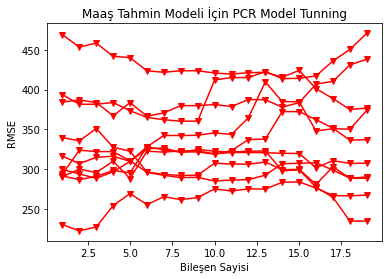

In [225]:
from sklearn import model_selection
import matplotlib.pyplot as plt
 


cv_10 = model_selection.KFold(n_splits = 10,
                              shuffle = True, 
                              random_state =1)

lm = LinearRegression()

RMSE = []

for i in np.arange(1,X_reduced_train.shape[1] +1):
     pls = PLSRegression(n_components=i)
     score = np.sqrt(-1*model_selection.cross_val_score(lm,
                                                        X_reduced_train[:,:i],
                                                        y_train.ravel(),
                                                        cv=cv_10,
                                                        scoring = 'neg_mean_squared_error'))
     RMSE.append(score)

plt.plot(np.arange(1,X_reduced_train.shape[1] +1), np.array(RMSE), '-v',c = "r")
plt.xlabel('Bileşen Sayisi')
plt.ylabel('RMSE')
plt.title("Maaş Tahmin Modeli İçin PCR Model Tunning");
# grafik hatalı salla
     
# grafikten en az rmse ye karşıık gelen bileşen sayısını seçmeliyiz. yaklaşık 2 olması gerekiyor.

In [0]:
pls_model = PLSRegression(n_components=2).fit(X_train,y_train) # final modeli

In [0]:
# burdan test hatası eğitim hatası , r2 vs. şeyler hesaplanabilir.

# Ridge Regresyon Model

In [0]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms  = pd.get_dummies(df[["League","Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division", "NewLeague"],axis = 1).astype('float64')
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [0]:
from sklearn.linear_model import Ridge

In [230]:
ridge_model = Ridge(alpha = 0.1).fit(X_train,y_train)
ridge_model

# burada alpha parametresi lambdayı ifade ediyor.

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [231]:
ridge_model.coef_

array([-1.47971291e+00,  7.42480150e+00,  4.78254119e+00, -2.85482179e+00,
       -1.44072298e+00,  5.55296246e+00,  8.04637196e+00, -2.30117250e-01,
        1.07797047e-01, -4.72336604e-01,  1.68775333e+00,  9.42540405e-01,
       -8.20270639e-01,  2.47961735e-01,  2.25838687e-01, -6.48471398e-01,
        1.06725456e+02, -1.13602563e+02, -6.25772773e+01])

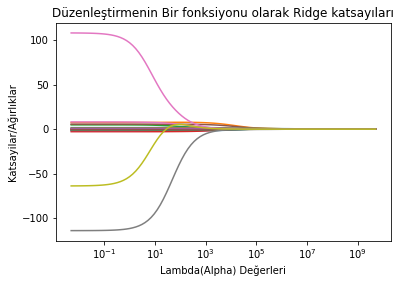

In [234]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 # çeşitli lambdalar

ridge_model = Ridge()
katsayilar =[]

for i in lambdalar:
  ridge_model.set_params(alpha = i) # her bir lambda değerini parametre olarak atıyorum
  ridge_model.fit(X_train,y_train) # modeli aktive ediyorum
  katsayilar.append(ridge_model.coef_) #bunu modelimin katsayısı olarak atıyorum.
# böylece lamda değerlerine göre değişen katsayıları incelemiş olacağım.


# çeşitli yapısal ayarlammalar grafiK için
ax = plt.gca() 
ax.plot(lambdalar, katsayilar)
ax.set_xscale('log')

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel("Katsayilar/Ağırlıklar")
plt.title('Düzenleştirmenin Bir fonksiyonu olarak Ridge katsayıları');

# kat sayıları modelde tutup 0 a yaklaştırır.

## Tahmin

In [0]:
y_pred = ridge_model.predict(X_test)

In [238]:
np.sqrt(mean_squared_error(y_test,y_pred))

358.1650491991773

## Model Tuning

In [0]:
# optimum labda değerini tespit edeceğiz.

In [240]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 # çeşitli lambdalar
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [0]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar, scoring = "neg_mean_squared_error", normalize= True)

In [243]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [244]:
ridge_cv.alpha_ # optimum lambda değeri

0.5748784976988678

In [0]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_,normalize=True).fit(X_train,y_train) #optimum alfa değerini alfaya atadım ve final modelini oluşturdum.

In [249]:
np.sqrt(mean_squared_error(y_train,ridge_tuned.predict(X_train)))

313.1300474192621

# Lasso Regresyon - Model

In [0]:
# ridge den farkı:  katsayıları 0'a yaklaştırmak yerine ceza uygulayarak 0 yapar.
# değişken seçimi yapar.

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np




hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms  = pd.get_dummies(df[["League","Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division", "NewLeague"],axis = 1).astype('float64')
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [0]:
from sklearn.linear_model import Lasso

In [252]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8944804.340318851, tolerance: 4367.048819449929
  positive)


In [253]:
lasso_model

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [254]:
lasso_model.coef_

array([  -1.43673183,    7.22922383,    4.52070259,   -2.69258341,
         -1.39179202,    5.49466544,    9.11216761,   -0.25552181,
          0.22651097,   -0.28773139,    1.62410937,    0.87535174,
         -0.79567609,    0.24668051,    0.23241433,   -0.64850633,
        106.83448227, -113.53593674,  -62.04160175])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4919.423502884805, tolerance: 4367.048819449929
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6129.448890905827, tolerance: 4367.048819449929
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13784.118313878775, tolerance: 4367.048819449929
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49430.54293

Text(0, 0.5, 'weights')

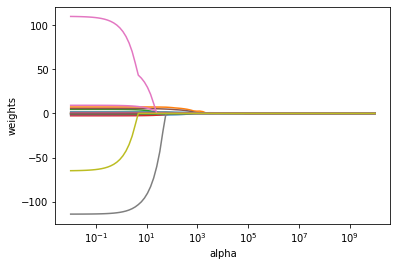

In [255]:
import matplotlib.pyplot as plt

lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 # çeşitli lambdalar
katsayilar =[]



for i in lambdalar:
  lasso.set_params(alpha = i) # her bir lambda değerini parametre olarak atıyorum
  lasso.fit(X_train,y_train) # modeli aktive ediyorum
  katsayilar.append(lasso.coef_) #bunu modelimin katsayısı olarak atıyorum.
# böylece lamda değerlerine göre değişen katsayıları incelemiş olacağım.


# çeşitli yapısal ayarlammalar grafik için
ax = plt.gca() 
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis("tight")
plt.xlabel('alpha')
plt.ylabel("weights")


## Tahmin

In [256]:
lasso_model.predict(X_test)

array([ 598.50772642,  689.07281012,  894.94567653,  415.30825213,
        328.61724641,  336.70949356,  654.86465708,  416.79018579,
        882.02105082,  730.14033333,  628.02500794,  896.34933356,
         93.48277165,  420.83579131,  272.53902129,  442.35532004,
        812.56316129,   40.82289057, 1250.22520976,  289.5424197 ,
        412.44113545,  698.34753239,  551.11944377,  605.12581587,
        634.91851653,  180.21694942,  852.02135078,  253.58774635,
        376.49945384,   70.53860565,  129.11219306,  125.05056649,
        364.84705431,  461.25336594,  282.07170876,  171.01218158,
       1430.75577471,   97.6240906 ,  131.25020191,  213.32125755,
         57.99123768,  300.04344775,  608.10917455,  336.79709285,
        750.43688761,  725.61888641,  290.60981636,  254.62210194,
        244.11020701,  639.46631604,  768.71402363,  301.92239026,
        771.74332742])

In [0]:
y_pred = lasso_model.predict(X_test)

In [258]:
np.sqrt(mean_squared_error(y_test, y_pred))

358.6413958431204

## Model Tuning

In [0]:
from sklearn.linear_model import LassoCV

In [0]:
lasso_cv_model = LassoCV(alphas = None, cv=10, max_iter = 10000,normalize = True)

In [261]:
lasso_cv_model .fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [262]:
lasso_cv_model.alpha_

0.12361135194429076

In [0]:
lasso_tuned = Lasso(alpha=lasso_cv_model.alpha_)

In [264]:
lasso_tuned.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8945037.841728436, tolerance: 4367.048819449929
  positive)


Lasso(alpha=0.12361135194429076, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [265]:
np.sqrt(mean_squared_error(y_test, y_pred))

358.6413958431204

In [0]:
y_pred = lasso_tuned.predict(X_test)

# ElasticNet Regresyon - Model ve Tahmin

In [0]:
# ridge ve lasso yaklaşımlarını birleştirir.

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np




hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms  = pd.get_dummies(df[["League","Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division", "NewLeague"],axis = 1).astype('float64')
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [0]:
from sklearn.linear_model import ElasticNet

In [271]:
enet_model = ElasticNet().fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9219929.076529367, tolerance: 4367.048819449929
  positive)


In [272]:
enet_model.coef_

array([ -1.61694103,   7.46019777,   2.60346369,  -2.49584787,
        -0.49720266,   5.38019309,   6.07654408,  -0.23306998,
         0.07107404,  -0.60880473,   1.74638227,   0.99206863,
        -0.75861262,   0.2545778 ,   0.2288989 ,  -0.82299964,
        15.41006115, -35.23558671,   4.76373134])

In [273]:
enet_model.intercept_

9.660172331609147

In [274]:
y_pred = enet_model.predict(X_test)
y_pred

array([ 546.84974647,  605.88596734,  905.61750212,  359.00782512,
        414.76638269,  294.56108553,  594.81315714,  437.72592886,
        854.59139739,  780.11069362,  645.82846288,  945.48882942,
         64.59873951,  353.09649616,  335.83712128,  489.32932969,
        777.88923005,   97.65190938, 1239.60192882,  340.40399495,
        441.57177906,  740.73965583,  569.55378623,  557.52854488,
        622.32761488,  222.1133524 ,  891.56801181,  302.23237276,
        315.6847882 ,  115.41504977,  158.92057781,   86.63976902,
        348.86119681,  408.2617455 ,  264.75511905,  281.14033403,
       1428.24864649,  109.67852057,   79.19496114,  246.58904663,
        126.84850237,  269.13191934,  675.08426126,  361.10167959,
        834.00794968,  752.53361759,  278.57934548,  385.94175332,
        286.84749807,  671.55648217,  711.53915176,  270.01166249,
        763.81331814])

In [275]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.78780126428234

In [276]:
r2_score(y_test, y_pred)

0.2962010344606606

## Model Tuning

In [0]:
from sklearn.linear_model import ElasticNetCV

In [0]:
enet_cv_model = ElasticNetCV(cv =10,random_state = 0).fit(X_train, y_train)

In [279]:
enet_cv_model.alpha_

1179.7218882369157

In [0]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [0]:
y_pred = enet_tuned.predict(X_test)

In [282]:
np.sqrt(mean_squared_error(y_test,y_pred))

378.23482159854797